In [2]:
'''
Lab 2
'''

import requests
from functools import reduce
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie


# Получение страницы вакансий
def get_vacancies(page, per_page):
    
    API_URL = 'https://api.hh.ru/vacancies'
    
    responce_data = {
        'text': """
            "машинное обучение" OR "machine learning" 
            OR "big data" OR "большие данные" 
            OR "искусственный интеллект" OR "нейронные сети" 
            OR "deep learning" OR "глубокое обучение" OR "глубинное обучение" 
            OR "data science" OR "data scientist" 
            OR "data engineer" OR "инженер данных" 
            OR "data mining" OR "datalogy" 
            OR "data analytics" 
        """,
        
        'currency': 'RUR',
        'only_with_salary': True,
        'per_page': per_page,
        'page': page
    }
    
    request = requests.get(url=API_URL, params=responce_data)
    return request.json().get('items')


# Получение 1000 вакансий
def get_full_list():

    PAGES_COUNT = 10
    PER_PAGE = 100
    
    vacancies = list()    
    for i in range(PAGES_COUNT):
        vacancies.extend(
            get_vacancies(page=i, per_page=PER_PAGE)
        )
    
    return vacancies


# Возвращает очищенное значение зарплаты
def clear_salary(salary):
    
    if not salary['to']:
        if not salary['from']:
            return 0
        return salary['from']
    
    if not salary['from']:
        return salary['to']
    
    return (salary['from'] + salary['to']) / 2


# Очистка имени работодателя
def clear_employer_name(employer):
    return employer['name']
    
    
# Очистка названия локации
def clear_area_name(area):
    return area['name']


# Выбор только нужных полей
def clear_vacancies(full_list):
    
    cleaned = list(map(
        lambda row: dict(
            salary=clear_salary(row['salary']),
            area=clear_area_name(row['area']),
            employer=clear_employer_name(row['employer']),
            name=row['name']
        ),
        full_list
    ))
    return cleaned


# Получение колличества предложений по каждой вакансии
def get_number_of_vacancies(vacancies):
    
    result = dict()
    for vacancy in vacancies:
        result[vacancy['name']] = result.get(vacancy['name'], 0) + 1
        
    return result
    
# получение средних значений зарплат для каждой вакансии    
def get_vacancy_avg(vacancies, quantities):
    
    result = dict()
    
    for vacancy in vacancies:
        result[vacancy['name']] = result.get(vacancy['name'], 0) + vacancy['salary']
    
    for vacancy in result.keys():
        result[vacancy] /= quantities[vacancy]
        
    return result


# получение количества предложений по городам
def get_vacancies_by_city(vacancies):
    
    result = dict()
    
    for vacancy in vacancies:
        result[vacancy['area']] = result.get(vacancy['area'], 0) + 1
        
    big_cities = {k:v for (k,v) in result.items() if v > 4}
    small_cities = {k:v for (k,v) in result.items() if v <= 4}
    
    others_cities = reduce((lambda x, value: x + value), small_cities.values(), 0)
    big_cities['others'] = others_cities
    
    return big_cities

print('Получение данных ...')
vacancies = clear_vacancies(get_full_list())
print('Данные получены')
offers_numbers = get_number_of_vacancies(vacancies)
offers_numbers_by_city = get_vacancies_by_city(vacancies)
vacancies_avg = get_vacancy_avg(vacancies, offers_numbers)

Получение данных ...
Данные получены


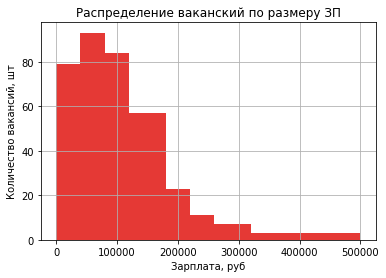

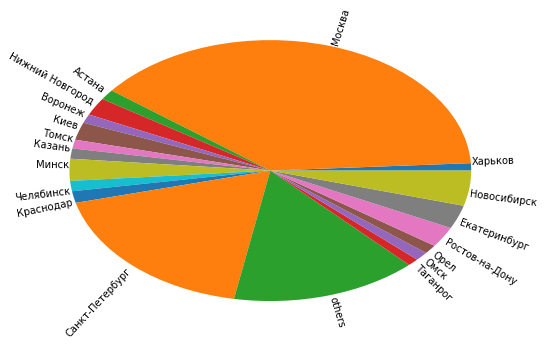

In [3]:
### Строим столбчатую диаграмму по распределению ваканский в зависимости от ЗП
n, bins, patches = plt.hist(
    vacancies_avg.values(), 
    range=(0, 500000), 
    color='#E53935', 
    bins=[
        0, 
        40000,
        80000,
        120000,
        150000,
        180000,
        220000,
        260000,
        320000,
        380000,
        500000
    ], 
    histtype='stepfilled'
)

### Наносим имена осей, название диаграммы и отображаем ее
plt.xlabel('Зарплата, руб')
plt.ylabel('Количество вакансий, шт')
plt.title('Распределение ваканский по размеру ЗП')
plt.grid(True)
plt.show()

### Строим круговоую диаграмму по распределению ваканский по городам
patches, texts = pie(offers_numbers_by_city.values(), 
                     None, offers_numbers_by_city.keys(), 
                     labeldistance=1, radius=1.5, 
                     rotatelabels=True)